# DS-SF-34 | 14 | Clustering | Codealong | Starter Code

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import decomposition, cluster

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A | What is Principal Component Analysis (PCA)?

In [9]:
X = pd.read_csv(os.path.join('..', 'datasets', 'dataset-14-pca.csv'))

# no y or c with unsupervised learning...

,x1,x2
0,3.814435,6.353013
1,5.170632,7.091755
2,3.676421,5.983656
3,2.504597,4.740656
4,3.924852,6.819234
...,...,...
495,3.994930,6.919834
496,4.957573,8.223106
497,5.185843,9.801179
498,4.167118,8.745430


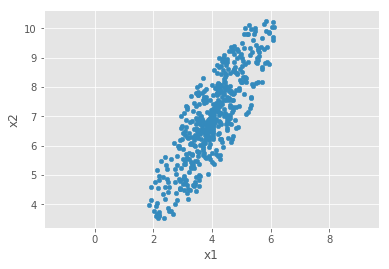

In [10]:
ax = X.plot(x = 'x1', y = 'x2', kind = 'scatter')
ax.set_aspect('equal', 'datalim')

In [12]:
X -= X.mean() #set the mean equals 0.

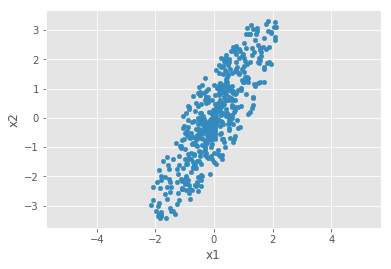

In [13]:
ax = X.plot(x = 'x1', y = 'x2', kind = 'scatter')
ax.set_aspect('equal', 'datalim')

In [15]:
# TODO
theta = - np.pi/3
V = np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta), np.cos(theta)]])

V

matrix([[ 0.5      , -0.8660254],
        [ 0.8660254,  0.5      ]])

In [20]:
X_prime = X.dot(V).rename(columns = {0: 'x1_prime', 1: 'x2_prime'})

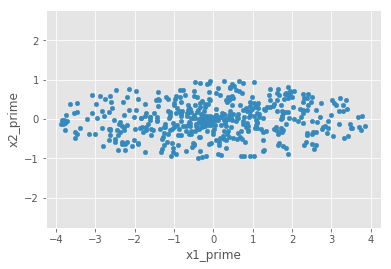

In [21]:
ax = X_prime.plot(x = 'x1_prime', y = 'x2_prime', kind = 'scatter')
ax.set_aspect('equal', 'datalim')

In [23]:
X.corr()

,x1,x2
x1,1.000000,0.841347
x2,0.841347,1.000000


In [22]:
# TODO
X.cov()

,x1,x2
x1,0.763985,1.088754
x2,1.088754,2.191914


## Part B | Principal Component Analysis (PCA) with `sklearn`

- (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [24]:
pca = decomposition.PCA().fit(X)

In [25]:
pca.components_

array([[-0.47519906, -0.87987831],
       [-0.87987831,  0.47519906]])

In [26]:
X_prime = pca.transform(X)

X_prime = pd.DataFrame(X_prime, columns = ['x1_prime', 'x2_prime'])

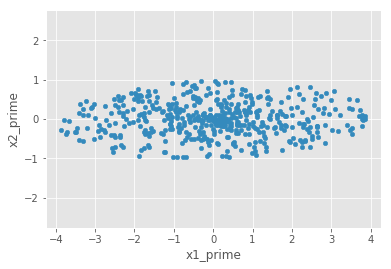

In [27]:
ax = X_prime.plot(x = 'x1_prime', y = 'x2_prime', kind = 'scatter')
ax.set_aspect('equal', 'datalim')

## Part C | Marketing Segmentation with the Ford Ka

In [30]:
X = pd.read_csv(os.path.join('..', 'datasets', 'dataset-14-ford-ka.csv'), index_col = 'id')

In [31]:
X

,Q1,Q2,Q3,Q4,Q5,...,Q58,Q59,Q60,Q61,Q62
id,,,,,,,,,,,
1,6,2,4,3,1,...,3,4,4,4,2
2,7,7,7,5,4,...,4,3,5,4,5
3,5,4,6,5,7,...,4,5,3,4,4
4,4,2,5,4,2,...,2,5,5,5,3
5,5,5,7,6,7,...,5,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...
246,6,7,5,5,3,...,5,2,3,4,5
247,4,3,6,7,6,...,2,5,4,4,4
248,6,5,3,1,4,...,6,6,1,2,2


### Checking for `NaN`

In [32]:
# TODO
null_data = X[X.isnull().any(axis=1)]
null_data

,Q1,Q2,Q3,Q4,Q5,...,Q58,Q59,Q60,Q61,Q62
id,,,,,,,,,,,


### Center and scale

62 attitudinal questions on a 7-point scale: 1 = strongly disagree; 4 = neigher disagree nor agree; 7 = strongly agree

In [ ]:
# TODO

### Principal Component Analysis (PCA)

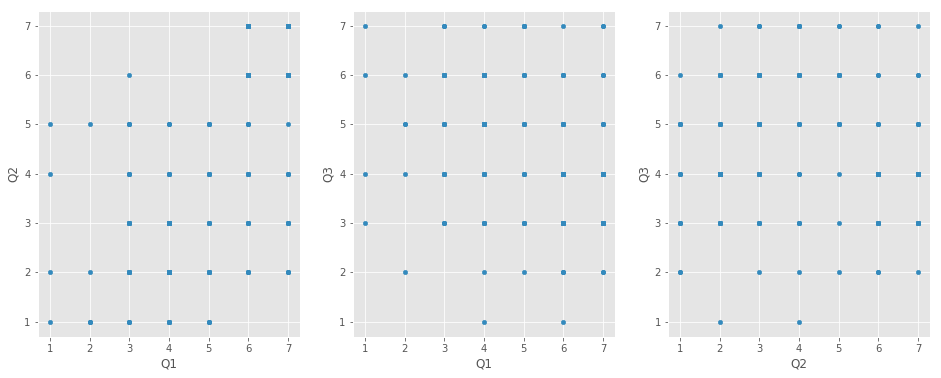

In [33]:
_, axs = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'Q1', y = 'Q2', ax = axs[0])
X.plot(kind = 'scatter', x = 'Q1', y = 'Q3', ax = axs[1])
X.plot(kind = 'scatter', x = 'Q2', y = 'Q3', ax = axs[2])

In [36]:
pca = decomposition.PCA().fit(X)

In [35]:
pca.n_components_

62

#### Explained Variance

In [37]:
normalized_var = pca.explained_variance_ratio_

In [38]:
normalized_var

array([ 0.34307738,  0.17691961,  0.09244568,  0.01479303,  0.01348088,
        0.01287346,  0.01252905,  0.01229448,  0.0116312 ,  0.01155003,
        0.01141081,  0.01088612,  0.01065068,  0.01023675,  0.00980565,
        0.00970013,  0.00935484,  0.00912774,  0.00890327,  0.0085995 ,
        0.00841132,  0.0082796 ,  0.00811105,  0.00776238,  0.00758853,
        0.00740232,  0.00694244,  0.00668767,  0.00654599,  0.0065302 ,
        0.00634308,  0.00614083,  0.00605071,  0.00577515,  0.00561425,
        0.00548123,  0.0053805 ,  0.00487332,  0.00483682,  0.00474037,
        0.00466974,  0.00447012,  0.004349  ,  0.00418052,  0.00401993,
        0.00395991,  0.00387482,  0.00370367,  0.00361474,  0.00342931,
        0.00328957,  0.00294592,  0.00286619,  0.00283253,  0.00277463,
        0.00262121,  0.00246656,  0.00231566,  0.00216999,  0.00197679,
        0.00192215,  0.00177897])

In [39]:
normalized_var.sum()

0.99999999999999967

#### Screeplot

(-0.01, 0.35307737877240197)

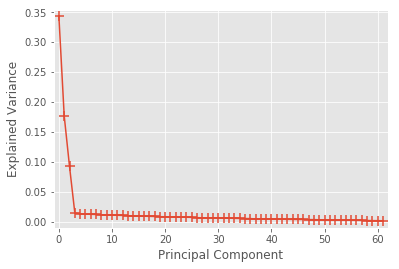

In [40]:
plt.plot(normalized_var)

plt.scatter(x = range(len(normalized_var)),
    y = normalized_var,
    marker = '+',
    s = 100)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xlim(-1, len(normalized_var))
plt.ylim(-.01, max(normalized_var) + .01)

In [41]:
cumulated_normalized_var = np.cumsum(normalized_var)

In [42]:
cumulated_normalized_var

array([ 0.34307738,  0.51999699,  0.61244267,  0.6272357 ,  0.64071659,
        0.65359004,  0.66611909,  0.67841357,  0.69004477,  0.7015948 ,
        0.71300561,  0.72389173,  0.73454241,  0.74477916,  0.75458481,
        0.76428494,  0.77363979,  0.78276753,  0.79167079,  0.8002703 ,
        0.80868162,  0.81696122,  0.82507227,  0.83283465,  0.84042318,
        0.8478255 ,  0.85476794,  0.86145561,  0.8680016 ,  0.87453181,
        0.88087488,  0.88701572,  0.89306643,  0.89884158,  0.90445583,
        0.90993706,  0.91531756,  0.92019088,  0.9250277 ,  0.92976807,
        0.93443781,  0.93890794,  0.94325694,  0.94743745,  0.95145738,
        0.9554173 ,  0.95929212,  0.96299579,  0.96661053,  0.97003984,
        0.97332941,  0.97627533,  0.97914152,  0.98197405,  0.98474868,
        0.98736989,  0.98983645,  0.9921521 ,  0.99432209,  0.99629887,
        0.99822103,  1.        ])

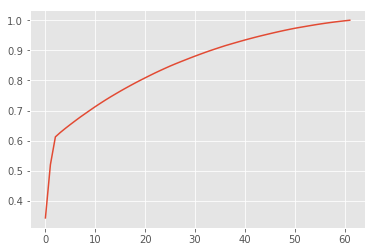

In [43]:
plt.plot(cumulated_normalized_var)

#### Principal Components

In [44]:
pca.components_

array([[ 0.12577537,  0.2491406 , -0.03645547, ...,  0.05007606,
         0.07448159,  0.05265921],
       [-0.05696789,  0.0755372 ,  0.17052116, ...,  0.00357045,
         0.02936008,  0.03368754],
       [ 0.25562272,  0.15818743, -0.07256437, ..., -0.25369009,
        -0.22075579, -0.20049613],
       ..., 
       [-0.18300038,  0.10765282,  0.1692844 , ..., -0.05835726,
        -0.03041397, -0.070239  ],
       [ 0.03850797, -0.10657318,  0.06550309, ..., -0.12311425,
         0.02999196, -0.09988279],
       [-0.11051957, -0.00112376,  0.06794346, ...,  0.0230528 ,
        -0.10056367, -0.07766536]])

In [45]:
pca.components_.shape

(62, 62)

#### `n_components = 3`

In [46]:
pca = decomposition.PCA(n_components = 3).fit(X)

X = pca.transform(X)

X = pd.DataFrame({'PC0': X.T[0], 'PC1': X.T[1], 'PC2': X.T[2]})

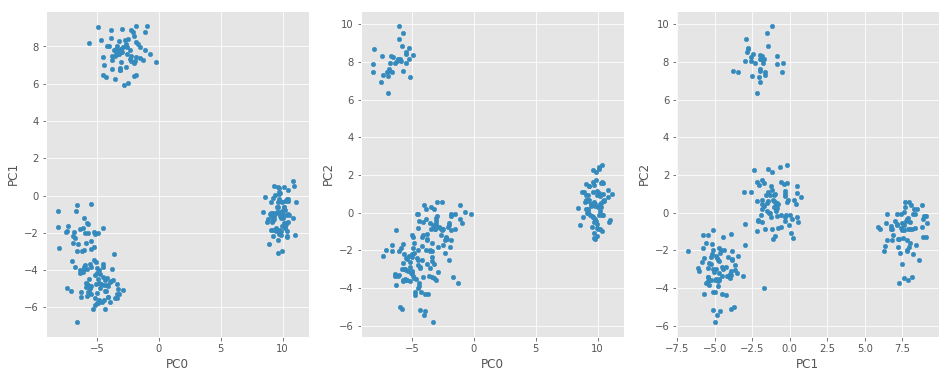

In [47]:
_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', ax = axes[0])
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', ax = axes[1])
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', ax = axes[2])

In [50]:
pc_0 = pca.components_[0]
pc_1 = pca.components_[1]
pc_2 = pca.components_[2]

### $k$-Means

- (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

#### `n_clusters = 4`

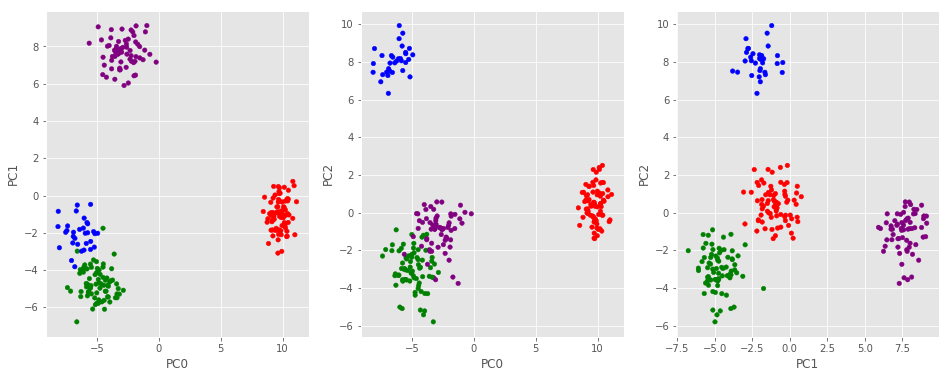

In [52]:
model = cluster.KMeans(n_clusters = 4, random_state = 0).fit(X)

cluster_ = pd.Series(model.labels_)

color = cluster_.map({0: 'red', 1: 'green', 2: 'blue', 3: 'purple'})

_, axes = plt.subplots(1, 3, figsize = (16, 6))

# TODO

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', ax = axes[0], c = color)
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', ax = axes[1], c = color)
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', ax = axes[2], c = color)

In [53]:
cluster_.value_counts()

0    78
1    75
3    65
2    32
dtype: int64

In [54]:
centroid_78 = pd.Series(pca.inverse_transform(model.cluster_centers_[0]))
centroid_75 = pd.Series(pca.inverse_transform(model.cluster_centers_[1]))
centroid_65 = pd.Series(pca.inverse_transform(model.cluster_centers_[2]))
centroid_32 = pd.Series(pca.inverse_transform(model.cluster_centers_[3]))

### Survey Questions

In [55]:
questions = '''I want a car that is trendy
I am fashion conscious
I do not have the time to worry about car maintenance
Basic transportation is all I need
Small cars are not prestigious
Today's cars last much longer than yesterday's
My car must function with total reliability
I want a car that is easy to handle
I am looking for a car which delivers a smooth ride
When I buy a car, dependability is most important to me
Today's cars are more efficient than yesterday's
I want a car that is fuel economic
I love to drive
The car I buy must be able to handle long motorway journeys
I want the most equipment I can get for my money
I want a vehicle that is environmentally friendly
I want a car that is nippy and zippy
I prefer buying my next car from the same car manufacturer
I wish there were stricter exhaust regulations
One should not spend beyond ones means
Good aerodynamics help fuel economy
Small cars are much safer nowadays
Buying a car on a lower interest rate does not interest me
I want a car that drives well on country roads
I consider myself an authority on cars
Small cars are for kids
Small cars are for women
Domestic made is best made
A car is a fashion accessory to me
Having a masculine car is important to me
I want a comfortable car
City driving is my main concern
Fuel economy comes at the expense of performance
I want a practical car
I have always been fascinated by cars which have a cult following
I like to believe that the car I drive will one day become a cult car
I prefer cars with high performance
I do not believe that a Swatch branded car will be successful
Small cars take up less room in today's traffic
I prefer small cars
In today's world it is anti-social to drive big cars
Many manufacturers do not really care about their customers needs
I would rather deal with a manufacturer's rep than a salesperson
I want to buy a car that makes a statement about me
A car is an extension of oneself
I always want the latest style and design in a vehicle
When it comes to cars my heart rules my head
My car must have a very individual interior
Nowadays smart cars are mainly foreign brands
People ought to buy domestic products for the good of the country
I want a car equipped with the latest features and technology
I have a relationship with my car
Quality and reliability of products are my main concerns
Image is not important to me in a car
Cars all look the same these days
Most environmentally friendly products do not perform as well as those they replaced
I want a car that has character
For me a car is a symbol of freedom and independence
I am interested in car maintenance
When buying a car I only consider a national make
The government should implement policies that favor public transportation
The government is right to tax large cars more heavily than small cars'''

questions = pd.Series(questions.splitlines())

questions

0                           I want a car that is trendy
1                                I am fashion conscious
2     I do not have the time to worry about car main...
3                    Basic transportation is all I need
4                        Small cars are not prestigious
                            ...                        
57    For me a car is a symbol of freedom and indepe...
58                   I am interested in car maintenance
59    When buying a car I only consider a national make
60    The government should implement policies that ...
61    The government is right to tax large cars more...
Length: 62, dtype: object

In [86]:
def interpret(v):
    v = pd.Series(v).sort_values(ascending = False)
    for question in questions[v.head(5).index]:
        print ('+ {}'.format(question))
    for question in questions[v.tail(5).index]:
            print ('- {}'.format(question))

> #### Interpreting the principal components

In [87]:
interpret(pc_0)

+ In today's world it is anti-social to drive big cars
+ I am fashion conscious
+ Buying a car on a lower interest rate does not interest me
+ I want to buy a car that makes a statement about me
+ When it comes to cars my heart rules my head
- Quality and reliability of products are my main concerns
- I have a relationship with my car
- One should not spend beyond ones means
- I want a comfortable car
- The car I buy must be able to handle long motorway journeys


In [82]:
interpret(pc_1)

+ Small cars are not prestigious
+ Basic transportation is all I need
+ I want a comfortable car
+ I have always been fascinated by cars which have a cult following
+ I like to believe that the car I drive will one day become a cult car
- I would rather deal with a manufacturer's rep than a salesperson
- In today's world it is anti-social to drive big cars
- Small cars take up less room in today's traffic
- I want to buy a car that makes a statement about me
- I want a car that is nippy and zippy


In [83]:
interpret(pc_2)

+ I want a car that is trendy
+ For me a car is a symbol of freedom and independence
+ I want a car that has character
+ I am interested in car maintenance
+ I prefer cars with high performance
- Many manufacturers do not really care about their customers needs
- The government is right to tax large cars more heavily than small cars
- The government should implement policies that favor public transportation
- When buying a car I only consider a national make
- Basic transportation is all I need


> #### Interpreting the clusters (i.e., the market segmentation)

In [88]:
interpret(centroid_78)

+ When it comes to cars my heart rules my head
+ My car must have a very individual interior
+ I always want the latest style and design in a vehicle
+ I want to buy a car that makes a statement about me
+ People ought to buy domestic products for the good of the country
- Image is not important to me in a car
- I have a relationship with my car
- Most environmentally friendly products do not perform as well as those they replaced
- Cars all look the same these days
- I want a car that drives well on country roads


In [89]:
interpret(centroid_75)

+ I want the most equipment I can get for my money
+ I want a car that is nippy and zippy
+ Small cars are much safer nowadays
+ Good aerodynamics help fuel economy
+ I wish there were stricter exhaust regulations
- Having a masculine car is important to me
- Domestic made is best made
- Buying a car on a lower interest rate does not interest me
- I want a car that drives well on country roads
- Small cars are not prestigious


In [90]:
interpret(centroid_65)

+ I prefer cars with high performance
+ For me a car is a symbol of freedom and independence
+ I want the most equipment I can get for my money
+ I want a comfortable car
+ Small cars are much safer nowadays
- In today's world it is anti-social to drive big cars
- Small cars are for kids
- Many manufacturers do not really care about their customers needs
- When buying a car I only consider a national make
- The government should implement policies that favor public transportation


In [91]:
interpret(centroid_32)

+ I have always been fascinated by cars which have a cult following
+ I prefer cars with high performance
+ I do not believe that a Swatch branded car will be successful
+ City driving is my main concern
+ Basic transportation is all I need
- Many manufacturers do not really care about their customers needs
- I want to buy a car that makes a statement about me
- In today's world it is anti-social to drive big cars
- I would rather deal with a manufacturer's rep than a salesperson
- Small cars take up less room in today's traffic
